In [1]:
# coding=utf-8

# Copyright 2015 and onwards Sanford Ryza, Uri Laserson, Sean Owen and Joshua Wills
#
# See LICENSE file for further information.

# this code assumes you are working from an interactive Thunder (PySpark) shell

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import thunder as td

In [5]:
from pyspark import SparkContext
sc = SparkContext("local[2]", "Analyzing_Neuroimaging _Data_with_PySpark_and _Thunder")

In [217]:
import thunder as td
data = td.images.fromexample('fish')

S3ResponseError: S3ResponseError: 403 Forbidden


In [195]:
img=data.values[:,:,:,0]

In [216]:
# plot the raw data
img = data.first()
plt.imshow(img[:, : ,0], interpolation='nearest', aspect='equal', cmap='gray')

# plot subsampled data
subsampled = data.subsample((5, 5, 1))
plt.imshow(subsampled.first()[1][:, : ,0], interpolation='nearest', aspect='equal', cmap='gray')
print (subsampled.shape)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

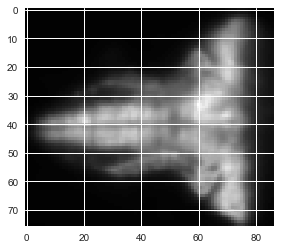

In [202]:
plt.imshow(img[:,:,0], interpolation='nearest', aspect='equal', cmap='gray')

In [214]:
subsampled=data.subsample([5,5,1,0])

TypeError: '<' not supported between instances of 'list' and 'int'

In [212]:
subsampled

Series
mode: local
dtype: uint8
shape: (76, 87, 2, 10)

In [130]:
# load some zebrafish brain data
data = td.images.frombinary('fish-long', engine=sc)

In [183]:
import thunder as td
data = td.series.fromexample('fish')

In [175]:
data.values[:,:,:,0].shape

(76, 87, 2)

In [144]:
data = data.astype(np.float32)

In [169]:
data[0].shape

(1, 87, 2, 20)

In [115]:
# explore the resulting object
print (data.dtype)

float16


In [132]:
print (data.values)

BoltArray
mode: spark
shape: (240, 76, 87, 2)



In [133]:
print (data.values.first())

[[[ 26.  26.]
  [ 26.  26.]
  [ 26.  26.]
  ..., 
  [ 26.  26.]
  [ 26.  26.]
  [ 26.  26.]]

 [[ 26.  26.]
  [ 26.  26.]
  [ 26.  26.]
  ..., 
  [ 40.  46.]
  [ 49.  46.]
  [ 45.  47.]]

 [[ 45.  40.]
  [ 35.  31.]
  [ 29.  28.]
  ..., 
  [ 27.  26.]
  [ 26.  26.]
  [ 26.  26.]]

 ..., 
 [[ 36.  37.]
  [ 37.  37.]
  [ 37.  40.]
  ..., 
  [ 40.  41.]
  [ 41.  41.]
  [ 40.  41.]]

 [[ 41.  41.]
  [ 41.  41.]
  [ 40.  39.]
  ..., 
  [ 33.  33.]
  [ 33.  33.]
  [ 33.  32.]]

 [[ 32.  32.]
  [ 31.  31.]
  [ 30.  30.]
  ..., 
  [ 27.  27.]
  [ 26.  26.]
  [ 26.  26.]]]


In [134]:
print (data.values._rdd)

PythonRDD[58] at RDD at PythonRDD.scala:48


In [135]:
print (data.values._rdd.first()[1].shape)

(76, 87, 2)


In [136]:
print (data.shape)

(240, 76, 87, 2)


In [137]:
data.first()

array([[[ 26.,  26.],
        [ 26.,  26.],
        [ 26.,  26.],
        ..., 
        [ 26.,  26.],
        [ 26.,  26.],
        [ 26.,  26.]],

       [[ 26.,  26.],
        [ 26.,  26.],
        [ 26.,  26.],
        ..., 
        [ 40.,  46.],
        [ 49.,  46.],
        [ 45.,  47.]],

       [[ 45.,  40.],
        [ 35.,  31.],
        [ 29.,  28.],
        ..., 
        [ 27.,  26.],
        [ 26.,  26.],
        [ 26.,  26.]],

       ..., 
       [[ 36.,  37.],
        [ 37.,  37.],
        [ 37.,  40.],
        ..., 
        [ 40.,  41.],
        [ 41.,  41.],
        [ 40.,  41.]],

       [[ 41.,  41.],
        [ 41.,  41.],
        [ 40.,  39.],
        ..., 
        [ 33.,  33.],
        [ 33.,  33.],
        [ 33.,  32.]],

       [[ 32.,  32.],
        [ 31.,  31.],
        [ 30.,  30.],
        ..., 
        [ 27.,  27.],
        [ 26.,  26.],
        [ 26.,  26.]]], dtype=float16)

In [138]:
print (data.count())

240


In [70]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [141]:
data.first()[:,:,0]

array([[ 26.,  26.,  26., ...,  26.,  26.,  26.],
       [ 26.,  26.,  26., ...,  40.,  49.,  45.],
       [ 45.,  35.,  29., ...,  27.,  26.,  26.],
       ..., 
       [ 36.,  37.,  37., ...,  40.,  41.,  40.],
       [ 41.,  41.,  40., ...,  33.,  33.,  33.],
       [ 32.,  31.,  30., ...,  27.,  26.,  26.]], dtype=float16)

In [149]:
data.first().shape

(76, 87, 2)

In [161]:
data.last

AttributeError: 'Images' object has no attribute 'last'

In [179]:
data.values[:,:,:,0].shape

(76, 87, 2)

TypeError: Invalid dimensions for image data

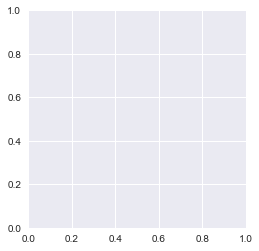

In [185]:
# plot the raw data
img =data[:,:,:,0].values
plt.imshow(img, interpolation='nearest', aspect='equal', cmap='gray')

In [ ]:
# coding=utf-8

# Copyright 2015 and onwards Sanford Ryza, Uri Laserson, Sean Owen and Joshua Wills
#
# See LICENSE file for further information.

# this code assumes you are working from an interactive Thunder (PySpark) shell

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import thunder as td

##################
# data exploration
##################

# load some zebrafish brain data
data = td.images.fromtif('/user/ds/neuro/fish', engine=sc)

# explore the resulting object
print data
print data.values
print data.values.first()
print data.values._rdd
print data.values._rdd.first()
print data.shape
print data.count()

# plot the raw data
img = data.first()
plt.imshow(img[:, : ,0], interpolation='nearest', aspect='equal', cmap='gray')

# plot subsampled data
subsampled = data.subsample((5, 5, 1))
plt.imshow(subsampled.first()[1][:, : ,0], interpolation='nearest', aspect='equal', cmap='gray')
print subsampled.shape

# reshuffle data to series representation
series = data.toseries()
print series.shape
print series.index
print series.count()
print series.values._rdd.takeSample(False, 1)[0]
print series.max().values

# distributed computation of stats
stddev = series.map(lambda s: s.std())
print stddev.values._rdd.take(3)
print stddev.shape

# collecting data locally and repacking it
repacked = stddev.toarray()
plt.imshow(repacked[:,:,0], interpolation='nearest', cmap='gray', aspect='equal')
print type(repacked)
print repacked.shape

# plot some of the time series themselves
plt.plot(series.center().sample(50).toarray().T)

# distributed computatino of custom statistics
series.map(lambda x: x.argmin())


###############################
# Clustering fish brain regions
###############################

import numpy as np
from pyspark.mllib.clustering import KMeans

images = td.images.frombinary(
    '/user/ds/neuro/fish-long', order='F', engine=sc)
series = images.toseries()

normalized = series.normalize(method='mean')
stddevs = (normalized
    .map(lambda s: s.std())
    .sample(1000))
plt.hist(stddevs.values, bins=20)
plt.plot(
    normalized
        .filter(lambda s: s.std() >= 0.1)
        .sample(50)
        .values.T)

# perform k-means on the normalized series
ks = [5, 10, 15, 20, 30, 50, 100, 200]
models = []
for k in ks:
    models.append(KMeans.train(normalized.values._rdd.values(), k))

# define a couple functions to score the clustering quality
def model_error_1(model):
    def series_error(series):
        cluster_id = model.predict(series)
        center = model.centers[cluster_id]
        diff = center - series
        return diff.dot(diff) ** 0.5

    return (normalized
        .map(series_error)
        .toarray()
        .sum())

def model_error_2(model):
    return model.computeCost(normalized.values._rdd.values())

# compute the error metrics for the different resulting clusterings
errors_1 = np.asarray(map(model_error_1, models))
errors_2 = np.asarray(map(model_error_2, models))
plt.plot(
    ks, errors_1 / errors_1.sum(), 'k-o',
    ks, errors_2 / errors_2.sum(), 'b:v')

# plot the best performing model
model20 = models[3]
plt.plot(np.asarray(model20.centers).T)

# finally, plot each brain region according to its characteristic behavior
from matplotlib.colors import ListedColormap
cmap_cat = ListedColormap(sns.color_palette("hls", 10), name='from_list')
by_cluster = normalized.map(lambda s: model20.predict(s)).toarray()
plt.imshow(by_cluster[:, :, 0], interpolation='nearest',
    aspect='equal', cmap='gray')
